In [1]:
import pandas as pd
import numpy as np

# 데이터 로드
df_maemae = pd.read_excel('./data/projects/주간 아파트 매매가격지수_20241026.xlsx') #파일경로 확인
df_jeonse = pd.read_excel('./data/projects/주간 아파트 전세가격지수_20241026.xlsx') #파일경로 확인

# 인덱스 설정 (첫 번째 열을 인덱스로 사용한다고 가정)
df_maemae.set_index(df_maemae.columns[0], inplace=True)
df_jeonse.set_index(df_jeonse.columns[0], inplace=True)

# 문자열을 숫자로 변환
df_maemae = df_maemae.apply(pd.to_numeric, errors='coerce')
df_jeonse = df_jeonse.apply(pd.to_numeric, errors='coerce')



# 전세가율 계산
df_ratio = (df_jeonse / df_maemae) * 100

# NaN 값 처리 (선택사항)
df_ratio = df_ratio.fillna(0)  # NaN 값을 0으로 대체

# 결과 확인
df_ratio

,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
지역명,,,,,,,,,,,,,,,,,,,,,
전국,100.266123,100.233726,100.124251,100.052367,99.883642,99.683109,99.498230,99.253380,99.030014,98.777837,...,100.162156,100.191500,100.207854,100.229434,100.258494,100.277344,100.294219,100.333644,100.379202,100.443428
서울,99.795449,99.682792,99.460027,99.232221,98.812172,98.412316,97.948792,97.365700,96.941121,96.448299,...,98.740744,98.663953,98.608682,98.558535,98.577335,98.500221,98.481548,98.501614,98.482399,98.513250
강북14개구,100.440523,100.295520,100.153882,100.050514,99.637420,99.365161,99.059364,98.633964,98.356731,98.022257,...,102.112088,102.091248,102.107500,102.136687,102.183245,102.155880,102.164113,102.199574,102.213648,102.255424
종로구,98.872791,98.834059,98.809106,98.222656,98.022361,97.975282,97.391829,97.202931,97.021831,96.581176,...,96.208668,96.415888,96.563531,96.606329,96.749915,96.951369,97.369797,97.576444,97.851971,98.095715
중구,99.150476,99.245538,99.251837,99.032265,98.078215,97.746700,97.116050,96.796673,96.313940,95.817924,...,97.483856,97.372201,97.250805,97.088980,97.042160,96.948174,96.960093,96.837750,96.775156,96.700301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
무주군,0.000000,0.000000,0.000000,99.455041,99.455041,99.455041,99.455041,99.455041,99.455041,99.455041,...,121.171996,120.724867,120.724867,120.724867,120.724867,120.724867,120.724867,120.724867,120.724867,120.724867
임실군,0.000000,0.000000,0.000000,95.653162,95.653162,95.653162,95.653162,95.653162,95.653162,95.653162,...,102.843721,102.530221,102.220170,101.913501,101.610154,101.310065,101.310065,101.013174,101.013174,100.427379
순창군,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.493810,100.493810,99.171681,99.171681,99.171681,99.171681,99.171681,99.171681,99.171681,99.171681


In [61]:
#df_all 로 이름 바꿈

top_30_rows = df_ratio.head(30)
top_30_rows.columns = top_30_rows.columns.astype('str')
df_all = top_30_rows
df_all = df_all.reset_index()
df_all


,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,100.266123,100.233726,100.124251,100.052367,99.883642,99.683109,99.498230,99.253380,99.030014,...,100.162156,100.191500,100.207854,100.229434,100.258494,100.277344,100.294219,100.333644,100.379202,100.443428
1,서울,99.795449,99.682792,99.460027,99.232221,98.812172,98.412316,97.948792,97.365700,96.941121,...,98.740744,98.663953,98.608682,98.558535,98.577335,98.500221,98.481548,98.501614,98.482399,98.513250
2,강북14개구,100.440523,100.295520,100.153882,100.050514,99.637420,99.365161,99.059364,98.633964,98.356731,...,102.112088,102.091248,102.107500,102.136687,102.183245,102.155880,102.164113,102.199574,102.213648,102.255424
3,종로구,98.872791,98.834059,98.809106,98.222656,98.022361,97.975282,97.391829,97.202931,97.021831,...,96.208668,96.415888,96.563531,96.606329,96.749915,96.951369,97.369797,97.576444,97.851971,98.095715
4,중구,99.150476,99.245538,99.251837,99.032265,98.078215,97.746700,97.116050,96.796673,96.313940,...,97.483856,97.372201,97.250805,97.088980,97.042160,96.948174,96.960093,96.837750,96.775156,96.700301
5,용산구,97.250547,96.835258,96.440967,95.834463,95.394199,94.811803,94.058870,93.300050,92.714342,...,89.292185,89.242694,89.521673,89.375120,89.358105,89.208497,89.193940,89.195999,89.100915,88.995876
6,성동구,99.089904,99.112664,98.894841,98.632007,98.250108,98.025205,97.720626,97.106973,96.514487,...,98.115871,98.069401,97.768474,97.726218,97.740544,97.494985,97.415623,97.344020,97.227493,97.236456
7,광진구,98.039095,97.715488,97.551537,97.353163,96.386750,96.078520,95.497564,94.867179,94.213247,...,94.195404,93.996992,94.076502,93.899718,93.847329,93.695159,93.674872,93.653255,93.518558,93.569977
8,동대문구,100.521775,100.673880,100.132442,99.667061,98.772435,98.347229,97.723243,97.474692,97.516731,...,100.578213,100.517440,100.511725,100.618315,100.611862,100.622358,100.598575,100.625602,100.671398,100.727384
9,중랑구,100.084912,100.587236,100.521230,100.686911,100.606631,100.610217,100.348650,99.973028,99.854037,...,102.757639,102.833552,102.965532,102.973789,102.971675,102.982542,102.975338,102.970977,102.973743,102.960213


In [62]:
#melt 함
df_all = df_all.melt(id_vars = ['지역명'], var_name = 'date', value_name = 'ratio')
df_all

,지역명,date,ratio
0,전국,2022-10-24 00:00:52,100.266123
1,서울,2022-10-24 00:00:52,99.795449
2,강북14개구,2022-10-24 00:00:52,100.440523
3,종로구,2022-10-24 00:00:52,98.872791
4,중구,2022-10-24 00:00:52,99.150476
...,...,...,...
3025,서초구,2024-10-21 00:00:52,89.576820
3026,강남구,2024-10-21 00:00:52,86.209083
3027,송파구,2024-10-21 00:00:52,88.509571
3028,강동구,2024-10-21 00:00:52,93.883733


In [74]:
# matplotlib에 사용할 기본 폰트를 지정
from matplotlib import rcParams
rcParams["font.family"] = "Noto Sans KR" # 가지고 있는 폰트로 바꾸기
rcParams["axes.unicode_minus"] = False #축에 음수 표현안되면, False 처리해줌

In [75]:
#한글을 쓰기 위해 지정하기 위한 폰트 검색
import matplotlib.font_manager as fm

#for_font = []
for i in fm.fontManager.ttflist:
    if i.name.find('Noto') != -1: # 가지고 있는 폰트로 바꾸기
        if i.weight == 500:
            for_font = i.name

print(for_font)

Noto Sans KR


In [98]:
#groupby로 원하는 지역 선택
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
df_seoul = df_all.loc[df_all['지역명'].isin(seoul_area)]
df_seoul_mod1 = df_seoul.groupby(by = ['지역명', 'date']).mean().reset_index()
df_seoul_mod1


,지역명,date,ratio
0,강남구,2022-10-24 00:00:52,97.585514
1,강남구,2022-10-31 00:00:52,97.621178
2,강남구,2022-11-07 00:00:52,97.802894
3,강남구,2022-11-14 00:00:52,97.384691
4,강남구,2022-11-21 00:00:52,96.881239
...,...,...,...
2520,중랑구,2024-09-30 00:00:52,102.975338
2521,중랑구,2024-10-07 00:00:52,102.970977
2522,중랑구,2024-10-14 00:00:52,102.973743
2523,중랑구,2024-10-21 00:00:52,102.960213


In [131]:
#when 컬럼 추가
df_seoul_mod1['when'] = df_seoul_mod1['date'].str[:7]
df_seoul_mod1

,지역명,date,ratio,when
0,강남구,2022-10-24 00:00:52,97.585514,2022-10
1,강남구,2022-10-31 00:00:52,97.621178,2022-10
2,강남구,2022-11-07 00:00:52,97.802894,2022-11
3,강남구,2022-11-14 00:00:52,97.384691,2022-11
4,강남구,2022-11-21 00:00:52,96.881239,2022-11
...,...,...,...,...
2520,중랑구,2024-09-30 00:00:52,102.975338,2024-09
2521,중랑구,2024-10-07 00:00:52,102.970977,2024-10
2522,중랑구,2024-10-14 00:00:52,102.973743,2024-10
2523,중랑구,2024-10-21 00:00:52,102.960213,2024-10


<function matplotlib.pyplot.show(close=None, block=None)>

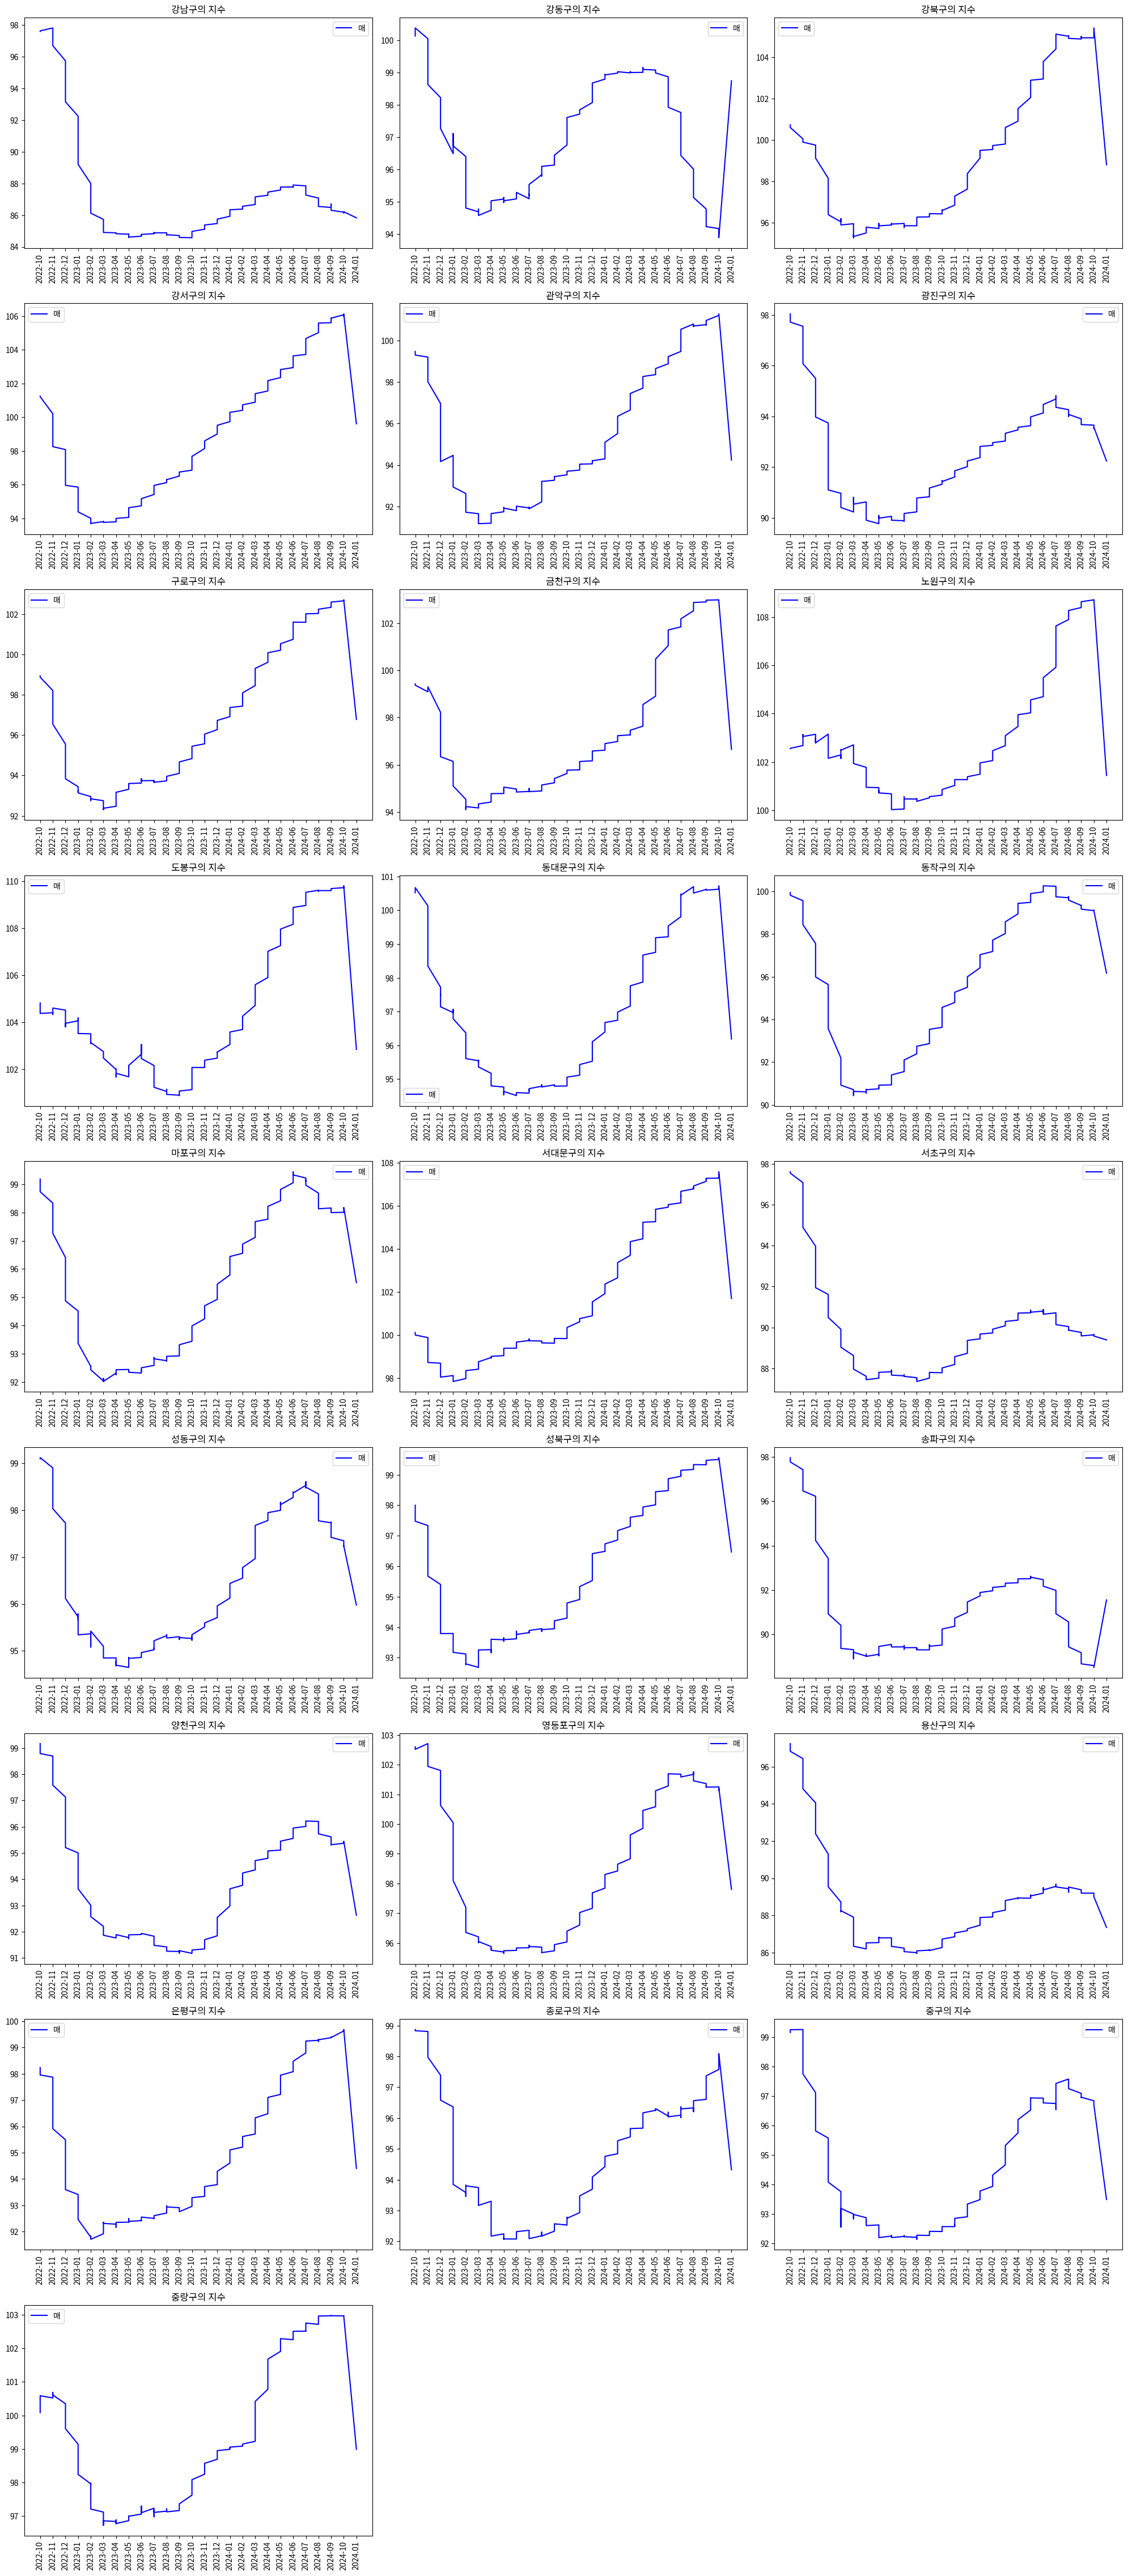

In [132]:
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
fig = plt.figure(figsize = (20, 50))
for idx, name in enumerate(seoul_area):
    temp_data = df_seoul_mod1[df_seoul_mod1['지역명'] == name]
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data["when"], temp_data["ratio"], color='blue')
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(name+'의 지수')
    axes.legend('매매지수 / 전세지수 * 100')

plt.tight_layout()
plt.show



In [ ]:
<전체 추세> 

- 2022-10 ~ 2023-7 급감함.
- 외부요인 영향 
- 금리 인상:
    2022년 7월과 10월에 한국은행이 기준금리를 빅스텝(0.5%p) 인상.
    이로 인해 대출 이자 부담이 크게 증가->주택 거래량 급격히 감소 
- 정부의 대출 규제 강화
- 매수심리 위축:
    지속적지속적인 집값 하락으로 인해 추가 하락에 대한 우려가 커지면서 매수 심리가 크게 위축 
- 정부 영향 : 
    2022년 5월 출범한 윤석열 정부의 부동산 정책 변화에 대한 시장의 반응과 적응 과정

    
2023-7 이후 점차 증가 
- 정부 정책 변화:
    윤석열 정부의 부동산 규제 완화 정책-> 시장에 긍정적인 영향
    재건축 규제 완화, 종합부동산세 완화 등의 정책

<앞으로의 동향 전망>
- 재건축 기대감이 높은 지역과 선호도가 높은 지역을 중심으로 상승세가 지속될 것으로 보입

- 가계부채 증가에 따른 리스크:
    주택 구입을 위한 가계대출이 크게 증가하고 있어, 이는 향후 시장의 불안요인이 될 수 있습니다2.
    금리 상승 시 대출 부담 증가로 인한 매물 출회 가능성이 있습니다.

경기 침체 우려:
소매판매가 9분기 연속 감소하는 등 내수 침체가 지속되고 있어,
이는 장기적으로 부동산 시장에 부정적 영향을 미칠 수 있음
    
    
결론적으로, 단기적으로는 서울 집값의 상승세가 이어질 가능성이 높지만,
가계부채 증가와 경기 침체 우려 등 잠재적 리스크 요인들로 인해 중장기적으로는 불확실성이 크다 .
투자자들은 이러한 다양한 요인들을 종합적으로 고려하여 신중한 접근이 필요



<전세가율 비교> 

- 전세가율이 높아지는 구는 투자 위험도 증가 & 잠재적인 '깡통주택' 위험
- 강남구, 서초구, 송파구  '강남 3구'& 용산구와  다른 구들 간의 차이 비교
    -> 강남 3구&용산구 의 전세가율은 50% 미만으로 상대적으로 낮은 편 : 안정적이라고 파악 
- 전체적인 전세가율 상승 추세 : 2023-7 이후 1년째 상승세를 보임 

<앞으로의 동향 파악> 
- 현재의 상승 추세가 지속될 경우, 일부 구에서는 전세가율이 더욱 높아질 수 있음. 
- 지역별 양극화: 강남 3구&용산구와 다른 구들 간의 전세가율 차이가 더욱 벌어질 가능성을 보임.